In [46]:
import pandas as pd
import json
import requests
import zlib
import requests
import zipfile,io
import tarfile
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
from datetime import datetime,timedelta
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('precision', 10)
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = mpl.rcParamsOrig['font.sans-serif']


In [3]:
hdd_path = '/media/kuo/bfddc57d-b35d-4995-82c5-a2945d092417/home/hao-chieh/venv/201807_黑客松_104_人力銀行/'

# 工作描述清理

In [55]:
job_desc = ! cat ./job.json | sed "s/$(echo -ne $'\u2028')//g"

In [58]:
job_desc

['{"custno":"7c01228e-5bc6-479d-9b18-c95e6678a468","jobno":"4371531","job":"國小安親課輔老師","jobcat1":"2016002008","jobcat2":"2016002011","jobcat3":"0","edu":56,"salary_low":990,"salary_high":990,"role":1,"language1":14444,"language2":1111,"language3":1111,"period":2,"major_cat":"0","major_cat2":"0","major_cat3":"0","industry":"1005001009","worktime":"週休二日","role_status":2049,"s2":4,"s3":0,"addr_no":6001005004,"s9":1,"need_emp":1,"need_emp1":2,"startby":2,"exp_jobcat1":"0","exp_jobcat2":"0","exp_jobcat3":"0","description":"※輔導國小課業內容。\\r\\n※中、英語能力尤佳。\\r\\n需有相關課輔經驗者，無經驗者勿試。","others":"1.提供勞健保\\n2.待遇優\\n3.需有耐心.愛心.抗壓性高/配合度佳-無誠者勿試/有安親經歷者尤佳"}',
 '{"custno":"6976d5c5-26a5-467d-8c00-eec6cc569c56","jobno":"9634973","job":"環保專職人員","jobcat1":"2009004003","jobcat2":"2009004008","jobcat3":"2009004001","edu":60,"salary_low":990,"salary_high":990,"role":1,"language1":182222,"language2":14444,"language3":1111,"period":-1,"major_cat":"0","major_cat2":"0","major_cat3":"0","industry":"1002007008","worktime":"週

In [57]:
len(job_desc)

458638

In [59]:
list_correct_parsed_lines = []
list_wrong_parsed_lines = []
for json_line in job_desc:
    try:
        list_correct_parsed_lines.append(json.loads(json_line))           
    except:
#         print(json_line)
        list_wrong_parsed_lines.append(json_line)

In [60]:
len(list_correct_parsed_lines)

458638

In [61]:
len(list_wrong_parsed_lines)

0

In [94]:
df_job_desc = pd.DataFrame(list_correct_parsed_lines)

In [63]:
df_job_desc.to_csv('./20180711_job_info.csv')

In [51]:
df_job_desc = pd.read_csv('./20180711_job_info.csv',
                          usecols=['addr_no','industry','major_cat','major_cat2','major_cat3'],
                          dtype={'addr_no':str,
                                 'industry':str,
                                 'major_cat':str,
                                 'major_cat2':str,
                                 'major_cat3':str
                                })

In [3]:
df_job_desc.columns

Index(['Unnamed: 0', 'addr_no', 'custno', 'description', 'edu', 'exp_jobcat1',
       'exp_jobcat2', 'exp_jobcat3', 'industry', 'job', 'jobcat1', 'jobcat2',
       'jobcat3', 'jobno', 'language1', 'language2', 'language3', 'major_cat',
       'major_cat2', 'major_cat3', 'need_emp', 'need_emp1', 'others', 'period',
       'role', 'role_status', 's2', 's3', 's9', 'salary_high', 'salary_low',
       'startby', 'worktime'],
      dtype='object')

In [118]:
df_district = pd.read_csv('./category/district.csv',
                          error_bad_lines=False,
                          usecols=['類目代碼','類目名稱'],
                         dtype={'類目代碼':str})

In [119]:
df_district

,類目代碼,類目名稱
0,6000000000,地區
1,6001000000,台灣地區
2,6001001000,台北市
3,6001001001,台北市中正區
4,6001001002,台北市大同區
5,6001001003,台北市中山區
6,6001001004,台北市松山區
7,6001001005,台北市大安區
8,6001001006,台北市萬華區
9,6001001007,台北市信義區


In [78]:
df_job_distric = df_job_desc[['addr_no']]

In [86]:
df_job_distric.merge(df_district,right_on='類目代碼',
                                     left_on = 'addr_no')

,addr_no,類目代碼,類目名稱
0,6001005004,6001005004,桃園市楊梅區
1,6001005004,6001005004,桃園市楊梅區
2,6001005004,6001005004,桃園市楊梅區
3,6001005004,6001005004,桃園市楊梅區
4,6001005004,6001005004,桃園市楊梅區
5,6001005004,6001005004,桃園市楊梅區
6,6001005004,6001005004,桃園市楊梅區
7,6001005004,6001005004,桃園市楊梅區
8,6001005004,6001005004,桃園市楊梅區
9,6001005004,6001005004,桃園市楊梅區


In [15]:
df_job_desc.groupby('addr_no')['industry'].value_counts().unstack('addr_no')
# .value_counts()
# 'addr_no','industry'

addr_no,0,10,3,32,4,48,5,56,60,6001001000,...,6008003004,6008003009,6008004000,6008004001,6008005000,6008005002,6008005017,63,7,8
industry,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,1.0,1.0,3.0,NaN,137.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0
1001001001,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001001002,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001001003,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001001004,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001001005,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001001006,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001002001,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001002003,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_job_desc['industry'] = df_job_desc['industry'].astype('str')

In [176]:
df_industry = pd.read_csv('./category/industry.csv')

In [177]:
df_industry['類目代碼'] = df_industry['類目代碼'].astype('str')

In [35]:
df_ = pd.merge(df_industry,df_job_desc, left_on='類目代碼',right_on='industry')

In [123]:
df_.addr_no = df_.addr_no.astype('str')

In [125]:
df_chinese_addr = pd.merge(df_district,df_,left_on='類目代碼',right_on='addr_no')[['類目名稱_x','類目名稱_y']]

In [131]:
df_chinese_addr.groupby('類目名稱_x')['類目名稱_y'].value_counts().unstack('類目名稱_y').fillna(0)

類目名稱_y,IC設計相關業,不動產經營業,不織布業,中學教育事業,乳品製造業,事務機器製造業,人力仲介代徵,人身保險業,人造纖維製造業,休閒服務業,...,鞋類／布類／服飾品批發業,鞋類／布類／服飾品零售業,食品什貨批發業,食品什貨零售業,食用油品及榖製品製造業,飲料店業,飲料製造業,餐館業,首飾及貴金屬批發業,首飾及貴金屬零售業
類目名稱_x,,,,,,,,,,,,,,,,,,,,,
上海市,25.0,3.0,0.0,1.0,0.0,0.0,165.0,9.0,0.0,2.0,...,3.0,7.0,14.0,21.0,1.0,13.0,2.0,16.0,0.0,2.0
中南美洲,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中歐,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中美洲,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
亞洲其他,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
其他亞洲,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
加拿大,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
北京市,5.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
南投縣,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
_.to_csv('./20180712_各地區工作類型次數分配表.csv')

In [53]:
df_department = pd.read_csv('./category/department.csv')

In [66]:
df_job_desc.groupby(['major_cat'])['major_cat2'].value_counts().unstack('major_cat2')

major_cat2,0,3001000000,3001001000,3001002000,3001003000,3001004000,3001005000,3002000000,3002001000,3002002000,...,3017004000,3017005000,3017006000,3017007000,3018000000,3018001000,3018002000,3018003000,3018004000,3018005000
major_cat,,,,,,,,,,,,,,,,,,,,,
0,339563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001000000,108.0,NaN,3.0,NaN,NaN,12.0,1.0,9.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,3.0,1.0
3001001000,23.0,1.0,NaN,2.0,5.0,36.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3001002000,8.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001003000,19.0,1.0,4.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
3001004000,355.0,41.0,53.0,7.0,15.0,NaN,47.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0
3001005000,5.0,NaN,1.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002000000,320.0,15.0,NaN,NaN,NaN,3.0,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,1.0,4.0


In [67]:
len(df_job_desc)

459750

In [78]:
df_department.類目代碼.sort_values(ascending=True)

0      3000000000
1      3001000000
2      3001001000
126    3001002000
130    3001003000
134    3001004000
138    3001005000
127    3002000000
3      3002001000
4      3002002000
5      3002003000
6      3002004000
7      3002005000
8      3002006000
9      3002007000
10     3002008000
11     3002009000
131    3003000000
12     3003001000
13     3003002000
14     3003003000
15     3003004000
16     3003005000
17     3003006000
18     3003007000
19     3003008000
20     3003009000
135    3004000000
21     3004001000
22     3004002000
          ...    
110    3014003000
111    3014004000
112    3014005000
113    3014006000
153    3015000000
114    3015001000
115    3015002000
116    3015003000
117    3015004000
118    3015005000
119    3015006000
154    3016000000
120    3016001000
121    3016002000
122    3016003000
123    3016004000
155    3017000000
136    3017001000
124    3017002000
128    3017003000
132    3017004000
140    3017005000
143    3017006000
145    3017007000
156    301

# 公司資料

In [23]:
df_company = pd.read_json('./company.json',lines=True,)

In [25]:
df_company = df_company[['name','invoice']]

In [48]:
len(df_company)

340715

In [2]:
res = requests.get('http://www.fia.gov.tw/opendata/bgmopen1.zip')

In [3]:
z = zipfile.ZipFile(io.BytesIO(res.content))
z.extractall('.')

In [15]:
df_invoice_open = pd.read_csv('./BGMOPEN1.csv',usecols=['營業地址','統一編號'])

In [18]:
df_invoice_open = df_invoice_open.dropna()

In [21]:
df_invoice_open['統一編號'] = df_invoice_open['統一編號'].astype('int')

/home/kuo/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_company.merge(df_invoice_open,left_on='invoice',right_on='統一編號')

In [36]:
# _.to_csv('20180711_公司營業地址(only營業中)_.csv')

In [43]:
df_invoice_close = pd.read_csv('./BGMOPEN1X.csv',usecols=['營業地址','統一編號'])

In [44]:
df_invoice_close = df_invoice_closed.dropna()

In [45]:
df_invoice_close['統一編號'] = df_invoice_close['統一編號'].astype('int')

In [ ]:
df_company.merge(df_invoice_close,left_on='invoice',right_on='統一編號')

In [50]:
# _.to_csv('20180711_公司營業地址(only歇業中)_.csv')

# training_data_action

In [12]:
chunk_action = pd.read_json(hdd_path + 'train-action.json',lines=True,chunksize=200000)

In [13]:
for i, chunk in enumerate(chunk_action):
    chunk.to_csv(hdd_path+'action/' + 'action_{}.csv'.format(i)) 

In [4]:
%%bash
ls

20180710_104_資料清理.ipynb
20180711_job_info.csv
20180711_公司營業地址(only歇業中)_.csv
20180711_公司營業地址(only營業中)_.csv
20180711_各地區的工作數量總和次數分配表.csv
20180712_各地區工作類型次數分配表.csv
20180713_query_string_次數分配.csv
BGMOPEN1.csv
BGMOPEN1X.csv
category
company.json
job.json
README.md


In [35]:
df_action_stat = pd.read_csv('./job-action-stat.csv',dtype={'jobno':str})

In [36]:
real_need_column = ['addr_no','jobno', 'exp_jobcat1','industry', 
               'job','jobcat1','language1','edu','major_cat',
              'startby','s2', 's3', 's9', 'salary_high'
              ]
dtype = {'addr_no':str,'jobno':str, 'exp_jobcat1':str,'industry':str, 
               'job':str,'jobcat1':str,'language1':str,'edu':str,'major_cat':str,
              'startby':str,'s2':str, 's3':str, 's9':str, 'salary_high':str}
df_job_desc = pd.read_csv('./20180711_job_info.csv',dtype=dtype,
                          usecols=real_need_column)

In [37]:
df_job_desc

,addr_no,edu,exp_jobcat1,industry,job,jobcat1,jobno,language1,major_cat,s2,s3,s9,salary_high,startby
0,6001005004,56,0,1005001009,國小安親課輔老師,2016002008,4371531,14444,0,4,0,1,990,2
1,6001005012,60,0,1002007008,環保專職人員,2009004003,9634973,182222,0,0,0,1,990,3
2,6001005012,6,0,1002007008,現場操作人員(固定班),2010001002,4863490,1111,0,0,0,1,990,3
3,6001001004,60,0,1002007008,業務人員(北區),2005003004,4736769,18888,3011003000,0,15,1,990,0
4,6001008007,60,0,1002007008,業務人員(南區),2005003004,4736818,18888,3011003000,0,15,1,990,0
5,6001008007,60,0,1002007008,業務人員(中區),2005003004,4736810,18888,3011003000,0,15,1,990,0
6,6001005012,6,0,1002007008,倉管人員,2011001004,5462550,1111,0,0,0,1,990,0
7,6001005012,48,0,1002007008,實驗室研究員,2008002005,4736831,14444,3007002000,0,0,1,990,0
8,6001002004,60,0,1011001003,行銷企劃人員,2004001005,10403432,1111,0,0,0,1,35,3
9,6001002004,63,0,1011001003,廠房清潔人員,2018002012,10203304,1111,0,0,0,1,26,0


In [40]:
df_action_with_job_detail = pd.merge(df_action_stat,df_job_desc,on='jobno')

In [43]:
df_action_with_job_detail.sort_values('viewJob',ascending=False)

,jobno,clickJob,clickSave,clickApply,viewJob,applyJob,saveJob,addr_no,edu,exp_jobcat1,industry,job,jobcat1,language1,major_cat,s2,s3,s9,salary_high,startby
203256,9795649,2,0,0,128663,308,652,6003002007,62,0,1016002003,(月薪高達100000元）【新加坡上市集團 BreadTalk 麵包物語連鎖店】- 烘焙師傅,2006001005,1111,0,0,0,11,0,2
235837,9855893,4,0,0,118918,315,968,6001002021,62,0,1002013004,✌ 日班近4萬 夜班近5萬 ((周休六日)) 悠哉人生請選擇 /機台操作員/ (近...,2010001002,1111,0,0,0,1,55,3
77542,10059919,3,0,0,86462,234,534,6001005012,56,2005003009,1011004001,★底薪5.6萬保證六個月業務專員(補助午餐、油資),2005003009,1111,0,0,0,3,56,3
406245,6927797,1,0,0,83967,153,217,6001001007,30,0,1011004001,起薪5萬，最快1年3個月升店長！國外獎勵旅遊競賽*2018年前進法國✈✈,2005003004,1111,0,0,0,1,0,1
435073,10136892,86,0,2,81968,1807,838,6001008014,56,0,1001006002,台灣美光記憶體股份有限公司各職位,2008001016,1111,0,0,0,15,0,3
180754,7314713,13,1,0,68387,323,342,6001005013,12,0,1002007005,生產助理工程師,2009002001,14444,3011003000,0,0,15,60,3
233623,9860754,3,0,0,52754,188,492,6001005009,62,0,1002013004,✌ ((周休六日)) 在這上班好開心 日班近4萬 夜班近5萬 /機台操作員/ (近龜山...,2010001002,1111,0,0,0,15,55,3
393170,7759476,1,0,0,49228,105,1290,6001001005,12,0,1003002013,ISSEY MIYAKE 三宅一生Sales Specialist - 大台北區,2005002004,14444,0,0,0,3,49,0
64953,9501601,5,0,0,48058,263,397,6001002020,63,0,1003001015,基層人員-薪資27000-35000,2011002003,1111,0,0,0,1,35,0
299497,10097367,5,0,0,47815,153,227,6001001007,56,0,1016002001,【一蘭拉麵】人事總務部 專員,2002001012,22222,0,0,0,1,990,1


In [47]:
# df_action_with_job_detail.viewJob.astype('int').sum()

115978587

In [218]:
df_action_with_job_detail.columns

Index(['jobno', 'clickJob', 'clickSave', 'clickApply', 'viewJob', 'applyJob',
       'saveJob', 'addr_no', 'edu', 'exp_jobcat1', 'industry', 'job',
       'jobcat1', 'language1', 'major_cat', 's2', 's3', 's9', 'salary_high',
       'startby'],
      dtype='object')

In [219]:
df_ = df_action_with_job_detail[['clickJob', 'clickSave', 'clickApply','industry','applyJob','saveJob','viewJob']]

In [208]:
df_ = df_.sort_values('applyJob',ascending=False).reset_index(drop = True)

In [213]:
df_.groupby('industry').mean()

,applyJob,saveJob,viewJob
industry,,,
0,5.666667,6.500000,192.833333
1001001001,9.282511,7.414971,248.529148
1001001002,8.757487,7.922574,256.983121
1001001003,12.972861,13.074373,344.568987
1001001004,17.226646,16.324655,435.565850
1001001005,10.004386,10.342105,357.809211
1001001006,10.561295,10.108767,306.963987
1001002001,3.241058,2.900146,107.561362
1001002003,11.080831,6.642032,252.045035


In [223]:
df_.set_index('industry',inplace=True)

In [224]:
df_['action_sum'] = df_.sum(axis=1)

/home/kuo/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
df_[['clickJob', 'clickSave', 'clickApply']].sum().sum()/df_[['applyJob','saveJob','viewJob']].sum().sum()

0.005960674997698378

In [199]:
# df_['pct']  = df_.applyJob/115978587

In [200]:
# s = df_[df_.pct.cumsum()<0.8].industry.value_counts(normalize=True)

In [202]:
# df_industry = df_industry[['類目代碼','類目名稱']]

### app action 時間

In [4]:
os.listdir(hdd_path+'action')[0:300]

['action_108.csv',
 'action_344.csv',
 'action_405.csv',
 'action_552.csv',
 'action_178.csv',
 'action_437.csv',
 'action_26.csv',
 'action_111.csv',
 'action_422.csv',
 'action_29.csv',
 'action_330.csv',
 'action_182.csv',
 'action_450.csv',
 'action_466.csv',
 'action_186.csv',
 'action_140.csv',
 'action_372.csv',
 'action_534.csv',
 'action_61.csv',
 'action_293.csv',
 'action_99.csv',
 'action_494.csv',
 'action_9.csv',
 'action_371.csv',
 'action_3.csv',
 'action_139.csv',
 'action_441.csv',
 'action_605.csv',
 'action_263.csv',
 'action_406.csv',
 'action_153.csv',
 'action_370.csv',
 'action_162.csv',
 'action_592.csv',
 'action_152.csv',
 'action_161.csv',
 'action_76.csv',
 'action_358.csv',
 'action_89.csv',
 'action_206.csv',
 'action_124.csv',
 'action_350.csv',
 'action_113.csv',
 'action_211.csv',
 'action_553.csv',
 'action_616.csv',
 'action_551.csv',
 'action_376.csv',
 'action_167.csv',
 'action_590.csv',
 'action_537.csv',
 'action_310.csv',
 'action_173.csv',
 'a

In [3]:
s = pd.concat([pd.read_csv(hdd_path+'action/{}'.format(file),usecols=['date']) for file in tqdm_notebook(os.listdir(hdd_path+'action')[300:])])

HBox(children=(IntProgress(value=0, max=319), HTML(value='')))

In [4]:
s.to_hdf(hdd_path+'action_time_.hdf','mydata',mode='a')

In [4]:
df_train_action = pd.read_hdf(hdd_path+'action.hdf','mydata')

In [6]:
df_train_action

,date
0,2018-05-15 02:07:57
1,2018-05-07 01:14:12
2,2018-05-07 01:14:38
3,2018-05-15 01:07:32
4,2018-05-15 01:56:03
5,2018-05-07 01:22:52
6,2018-05-07 01:23:12
7,2018-05-07 01:17:42
8,2018-05-15 05:49:52
9,2018-05-15 05:49:29


In [7]:
df_train_action['date'] = pd.to_datetime(df_train_action['date'])

df_train_action['date'] = df_train_action.date+timedelta(hours=8)

In [8]:
df_train_action.reset_index(drop=True,inplace=True)

In [9]:
df_train_action

,date
0,2018-05-15 10:07:57
1,2018-05-07 09:14:12
2,2018-05-07 09:14:38
3,2018-05-15 09:07:32
4,2018-05-15 09:56:03
5,2018-05-07 09:22:52
6,2018-05-07 09:23:12
7,2018-05-07 09:17:42
8,2018-05-15 13:49:52
9,2018-05-15 13:49:29


In [13]:
df_job_search_freq = (df_train_action.groupby([df_train_action.date.dt.weekday,
                         df_train_action.date.dt.hour]).count().unstack())

In [21]:
df_job_search_freq.columns  = df_job_search_freq.columns.droplevel()

In [25]:
df_job_search_freq.columns.name = 'hour'
df_job_search_freq.index.name = 'dayofweek'

Text(0.5,1,'工作查詢(+on mobile)點擊時間熱度分佈')

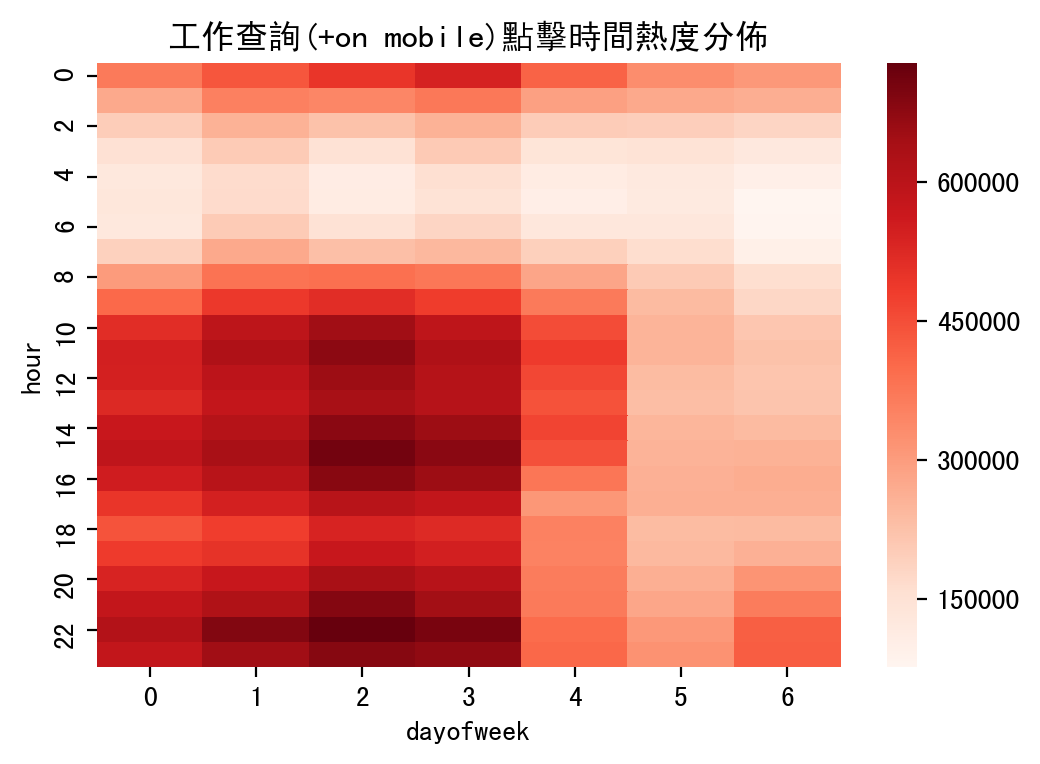

In [29]:
plt.figure(dpi = 200)
sns.heatmap(df_job_search_freq.T,cmap="Reds")
plt.title('工作查詢(+on mobile)點擊時間熱度分佈')

### action裝置

In [32]:
s = pd.concat([pd.read_csv(hdd_path+'action/{}'.format(file),usecols=['source']) for file in tqdm_notebook(os.listdir(hdd_path+'action')[300:])])

HBox(children=(IntProgress(value=0, max=319), HTML(value='')))

In [33]:
s.to_hdf(hdd_path+'action_time_.hdf','source',mode='a')

In [35]:
df_source = pd.read_hdf(hdd_path+'action.hdf','source')

In [36]:
df_source.source.value_counts(normalize=True)

app          0.479088
web          0.262888
mobileWeb    0.258024
Name: source, dtype: float64

### action jobno

In [3]:
s = pd.concat([pd.read_csv(hdd_path+'action/{}'.format(file),usecols=['action','jobno']) for file in tqdm_notebook(os.listdir(hdd_path+'action')[:])])

HBox(children=(IntProgress(value=0, max=619), HTML(value='')))

In [4]:
s.to_hdf(hdd_path+'action.hdf','action_jobno',mode='w')

In [3]:
df_jobno = pd.read_hdf(hdd_path+'action.hdf','action_jobno')

In [4]:
len(df_jobno)

123779885

In [5]:
df_jobno.groupby(['jobno','action'])['action'].count().unstack('action')

action,applyJob,saveJob,viewJob
jobno,,,
169,1.0,NaN,324.0
211,4.0,1.0,332.0
361,2.0,2.0,313.0
575,3.0,3.0,382.0
578,3.0,2.0,243.0
579,NaN,5.0,240.0
602,NaN,1.0,157.0
603,NaN,1.0,223.0
638,2.0,47.0,791.0


In [6]:
df_jobno_action = _

In [7]:
# df_jobno_ = df_jobno.jobno.value_counts(normalize=True).to_frame('pct')

In [7]:
df_jobno_action.index = df_jobno_action.index.astype(str)

In [50]:
# df_jobno_ = df_jobno_.reset_index()

In [53]:
# df_jobno_.rename(columns={'index':'jobno'},inplace=True)

In [8]:
df_job_desc = pd.read_csv('./20180711_job_info.csv',
                          usecols=['custno','jobno','job',],
                          dtype={'custno':str,
                                 'jobno':str,
                                 'job':str
                                })

In [9]:
len(df_job_desc)

459750

In [10]:
df_job_desc_v2 = pd.merge(df_jobno_action,df_job_desc,left_index=True,right_on='jobno')

In [11]:
df_company = pd.read_json('./company.json',lines=True)[['custno','name']]

In [12]:
pd.merge(df_job_desc_v2,df_company)

,applyJob,saveJob,viewJob,custno,job,jobno,name
0,1.0,NaN,324.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(忠孝),169,日盛金融控股股份有限公司
1,1.0,NaN,117.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(樹林),516592,日盛金融控股股份有限公司
2,NaN,NaN,95.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(木柵),516593,日盛金融控股股份有限公司
3,2.0,2.0,113.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(士林),516594,日盛金融控股股份有限公司
4,NaN,NaN,79.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(南京),516600,日盛金融控股股份有限公司
5,NaN,NaN,91.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(信義),516604,日盛金融控股股份有限公司
6,3.0,NaN,146.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(板橋),516844,日盛金融控股股份有限公司
7,3.0,3.0,102.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(三重),516850,日盛金融控股股份有限公司
8,NaN,1.0,115.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(新莊),516851,日盛金融控股股份有限公司
9,1.0,1.0,135.0,eebdfef7-97a2-4c5d-889b-f1f72c50b025,營業員(桃園),516856,日盛金融控股股份有限公司


In [16]:
df_job_action_stat = pd.read_csv('./job-action-stat.csv',dtype={'jobno':str})

In [17]:
df_job_action_stat_details = pd.merge(pd.merge(df_job_action_stat,df_job_desc),df_company)

In [18]:
df_job_action_stat_details.name.nunique()

46078

In [30]:
len(df_job_action_stat_details)

458399

In [ ]:
df_job_action_stat_details.sum(axis=0)
# .sum(level = ['clickJob','clickSave'],axis=1)

In [20]:
df_job_action_stat_details.to_csv('./20180713_工作點擊統計表_with_工作和公司名稱.csv)')

In [21]:
df_job_action_stat_details

,jobno,clickJob,clickSave,clickApply,viewJob,applyJob,saveJob,custno,job,name
0,4371531,0,0,0,94,1,2,7c01228e-5bc6-479d-9b18-c95e6678a468,國小安親課輔老師,D&V英語藝術學院_私立大衛與費雯莉英語短期補習班
1,9634973,2,0,0,437,5,4,6976d5c5-26a5-467d-8c00-eec6cc569c56,環保專職人員,約泰實業股份有限公司
2,4863490,2,0,0,279,5,3,6976d5c5-26a5-467d-8c00-eec6cc569c56,現場操作人員(固定班),約泰實業股份有限公司
3,4736769,1,0,0,255,7,4,6976d5c5-26a5-467d-8c00-eec6cc569c56,業務人員(北區),約泰實業股份有限公司
4,4736818,0,0,0,235,3,0,6976d5c5-26a5-467d-8c00-eec6cc569c56,業務人員(南區),約泰實業股份有限公司
5,4736810,3,0,0,296,12,3,6976d5c5-26a5-467d-8c00-eec6cc569c56,業務人員(中區),約泰實業股份有限公司
6,5462550,0,0,0,243,4,3,6976d5c5-26a5-467d-8c00-eec6cc569c56,倉管人員,約泰實業股份有限公司
7,4736831,6,0,0,368,17,8,6976d5c5-26a5-467d-8c00-eec6cc569c56,實驗室研究員,約泰實業股份有限公司
8,10403432,0,0,0,72,2,0,a0e2e1c6-9813-4b58-b183-c9f2f044360e,行銷企劃人員,磐碩營造股份有限公司
9,10203304,0,0,0,163,0,1,a0e2e1c6-9813-4b58-b183-c9f2f044360e,廠房清潔人員,磐碩營造股份有限公司


# training_data_click

## 假設集
1. 
2. 

In [4]:
df_train_click = pd.read_json(hdd_path + 'train-click.json',lines=True)

In [10]:
df_train_click['action'].unique()

array(['clickJob', 'clickApply', 'clickSave'], dtype=object)

In [5]:
df_train_click.sort_values(by='date')

,action,date,joblist,jobno,querystring,source
68488,clickJob,2018-04-30 17:01:03,"[8280294, 9519076, 8280351, 8514176, 10115425,...",9384612,ro=0&keyword=%E8%9D%A6%E7%9A%AE&order=1&asc=0&...,web
674703,clickJob,2018-04-30 17:01:06,"[10153003, 10057420, 10067682, 10067694, 10097...",10051170,ro=0&keyword=%E6%9C%8D%E9%A3%BE%20%E6%96%B0%E8...,web
505663,clickJob,2018-04-30 17:01:09,"[7434313, 9484963, 9730964, 8741966, 8924879, ...",8003385,ro=0&jobcat=2007000000&keyword=ERP&area=600100...,web
427644,clickJob,2018-04-30 17:01:12,"[9584957, 10210645, 10269075, 10269076, 102690...",10269078,keyword=%E5%9C%A8%E5%AE%B6%E5%B7%A5%E4%BD%9C&a...,web
561380,clickJob,2018-04-30 17:01:14,"[5795589, 8250219, 8057745, 9040044, 6781658, ...",7514963,ro=0&keyword=php&area=6001010001%2C6001010002%...,web
661201,clickJob,2018-04-30 17:01:24,"[3434302, 9935076, 3639175, 8733008, 9609456, ...",9650775,ro=0&keyword=%E8%A1%8C%E9%8A%B7%E4%BC%81%E5%8A...,web
348856,clickJob,2018-04-30 17:01:27,"[9497373, 9803734, 9888427, 9962788, 10044287,...",9622450,keyword=%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92&j...,web
698455,clickJob,2018-04-30 17:01:31,"[10274091, 10256929, 9507730, 8978040, 9328912...",9866529,ro=0&keyword=%E6%97%A5%E6%96%87&order=1&asc=0&...,web
199131,clickJob,2018-04-30 17:01:38,"[7112032, 7310296, 6885778, 6885801, 7663955, ...",8055950,ro=0&keyword=%E6%B7%BB%E5%A5%BD%E9%81%8B&order...,web
226762,clickJob,2018-04-30 17:01:38,"[8049959, 8388010, 9217922, 9254242, 10189438,...",9859639,ro=0&keyword=%E9%8A%80%E8%A1%8C%20%E8%B3%87%E5...,web


In [165]:
df_action = df_train_click.groupby([df_train_click.date.dt.weekday,df_train_click.date.dt.hour,'action'])['action'].count().unstack('action')

In [185]:
for 
df_action['clickApply'].unstack().corrwith(df_job_search_freq.T)

0     0.888473
1     0.546631
2     0.839813
3     0.861739
4    -0.076409
5     0.386525
6    -0.111574
7     0.173432
8     0.081654
9     0.962447
10    0.966609
11    0.906615
12    0.908539
13    0.977833
14    0.690505
15    0.938931
16    0.849030
17    0.732167
18    0.876155
19    0.703504
20    0.857830
21    0.309818
22    0.673930
23    0.730382
dtype: float64

In [6]:
df_train_click['date'] = pd.to_datetime(df_train_click['date'])

df_train_click['date'] = df_train_click.date+timedelta(hours=8)

In [8]:
# 或許工作點擊有時間上的分佈
df_job_search_freq = (df_train_click.groupby([df_train_click.date.dt.weekday,
                         df_train_click.date.dt.hour])['action'].count().unstack().T)

In [10]:
df_job_search_freq.columns.name = 'dayofweek'
df_job_search_freq.index.name = 'hour'

In [171]:
df_job_search_freq

dayofweek,0,1,2,3,4,5,6
hour,,,,,,,
0,3615,4072,5487,5335,4288,3301,2452
1,2124,3159,3248,3325,2353,2011,1831
2,1110,1872,1725,1553,1303,1157,1313
3,1028,1044,1118,960,676,741,548
4,507,609,565,726,497,488,486
5,437,460,631,650,366,378,260
6,616,602,663,752,596,490,215
7,858,992,1233,1113,991,730,361
8,2323,2746,2920,2694,2015,1083,1058


Text(0.5,1,'工作查詢點擊時間熱度分佈')

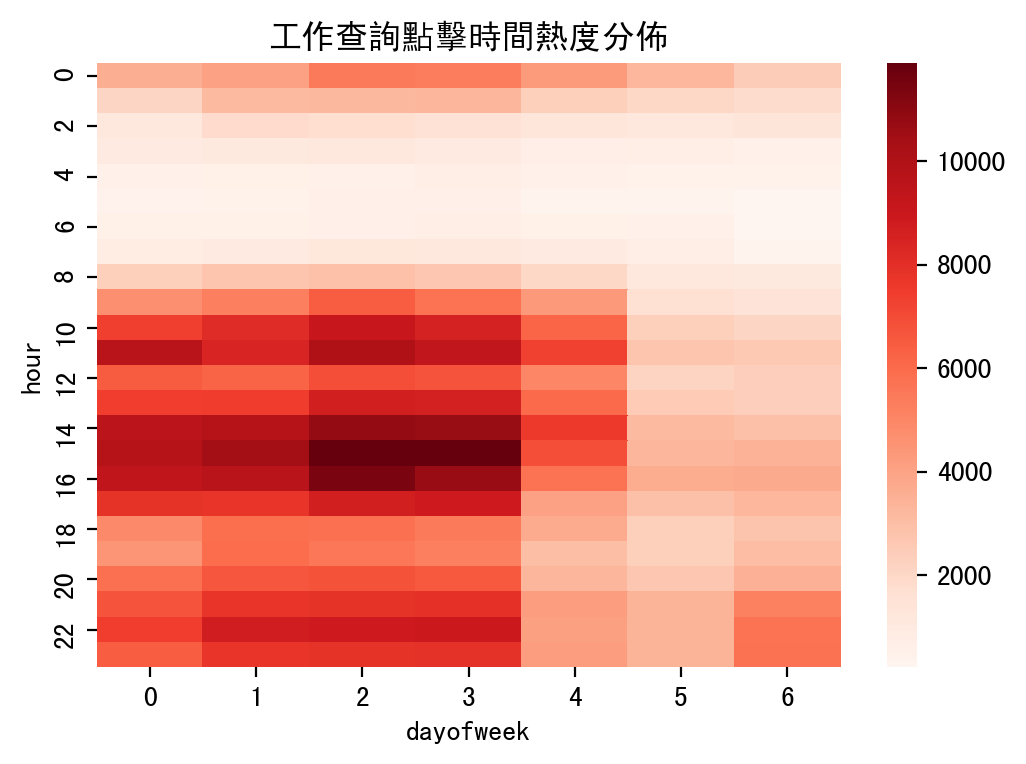

In [17]:
plt.figure(dpi = 200)
sns.heatmap(df_job_search_freq,cmap="Reds")
plt.title('工作查詢點擊時間熱度分佈')

## 解析query_string

### 工作描述文字雲

In [13]:
# s = df_train_click.querystring[0]

In [5]:
from urllib import parse

In [6]:
df_query_string = pd.DataFrame(parse.parse_qs(query) for query in df_train_click.querystring)

In [192]:
# (df_query_string.count()
#  .to_frame(name='freq')
#  .sort_values(by='freq',
#               ascending=False)
#  .to_csv('./20180713_query_string_次數分配.csv'))

In [201]:
# df = pd.read_table('/tmp/queryString_ch.txt',names=['說明'])

# dict_query_code = {}
# for d in df['說明']:
#     i = iter(d.split(':'))
#     dict_query_code.update(dict(zip(i,i)))

In [10]:
df_query_string.to_csv('/tmp/query_string.csv')

In [8]:
print(123)

123


In [11]:
df_query_string['keyword'][0:3]

0      [日文]
1     [IOS]
2    [作業員 ]
Name: keyword, dtype: object

In [17]:
from collections import Counter

In [15]:
# %%debug
list_query_string = []
for i in df_query_string['keyword'][0:-1]:
#     print(i)
    try:
        list_query_string.append(i[0])
    except:
        pass

In [20]:
d = Counter(list_query_string)

In [29]:
df = pd.DataFrame.from_dict(d, orient='index')

In [36]:
df = df.rename(columns={0:'freq'})

In [40]:
df.sort_values('freq',ascending=False).to_csv('./20180714_keyword_出現次數.csv')

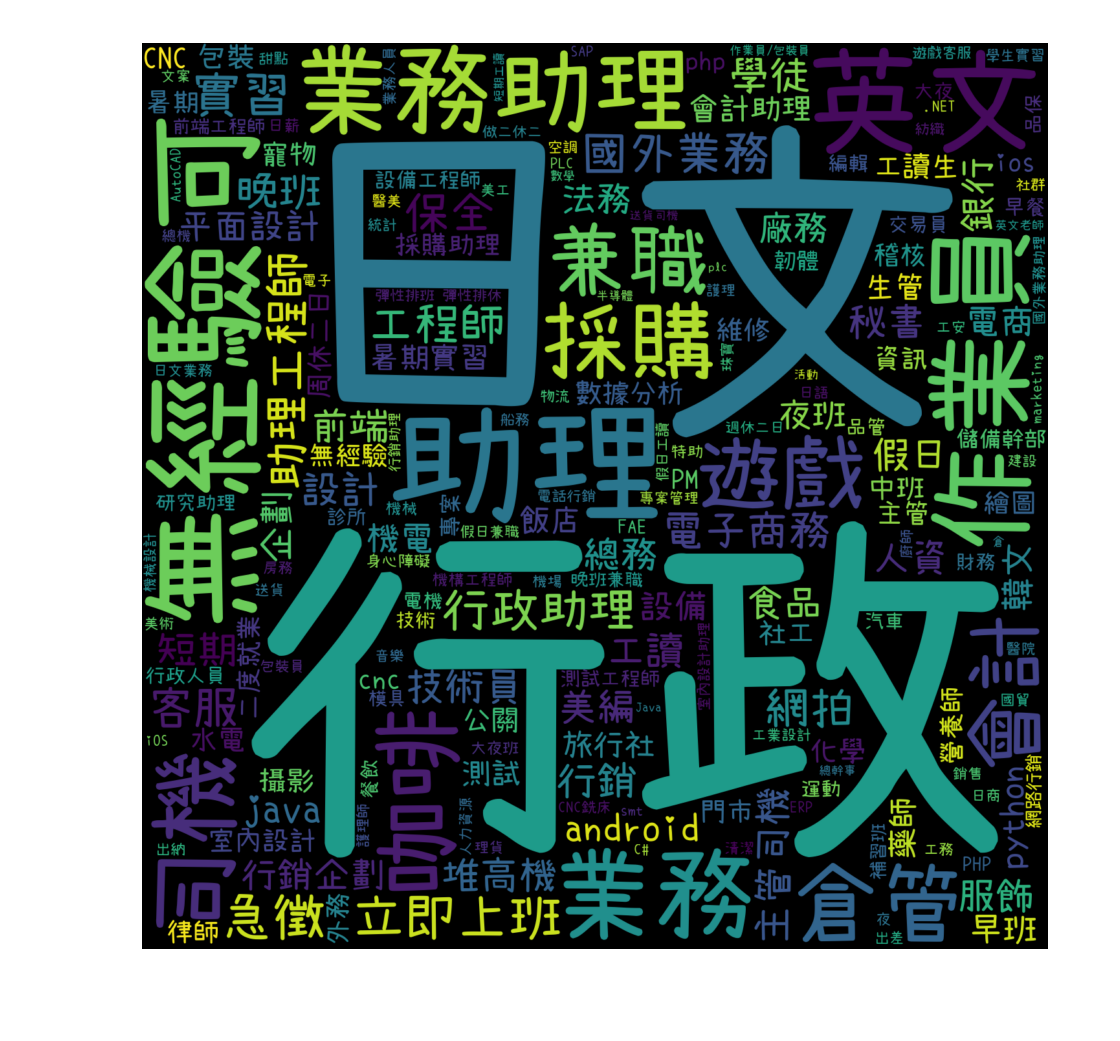

In [53]:
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/setofont.ttf',width=1400, height=1400, margin=2)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(dpi=300)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('keyword.png')

In [28]:
df_query_string.columns

Index([' jobsource', 'area', 'asc', 'cat', 'dep', 'dis_role', 'edu',
       'excludeIndustryCat', 'excludeJobKeyword', 'expcate', 'indcat', 'isnew',
       'jobcat', 'jobexp', 'jobsource', 'keyword', 'kwop', 'lang', 'm', 'mode',
       'order', 'ro', 'rostatus', 's5', 's9', 'scmax', 'scmin', 'sctp', 'sr',
       'utm_campaign', 'utm_expid', 'utm_medium', 'utm_referrer', 'utm_source',
       'wf', 'wktm', 'wt', 'zone'],
      dtype='object')

In [229]:
s = df_query_string.count().index[1]

In [235]:
print(map(z,s))

<function dict.get>

In [79]:
list_new_query_list = []
for list_string in df_query_string['area']:
#     print(list_string)
    try:
        for query_string in list_string:
            list_new_query_list.append(query_string.split(','))
    # .apply(lambda x :len(x)).value_counts()
    except:
        list_new_query_list.append(list())
        

In [83]:
df_query_string['area'] = pd.Series(list_new_query_list)

In [85]:
df_query_string['area'].apply(lambda x :len(x)).value_counts()

1     253053
0     201824
2     133741
3      46393
4      28324
5      21187
6      15338
7      11670
8      10934
10      9201
9       6335
Name: area, dtype: int64

In [103]:
df_query_string[df_query_string.dep.fillna(0)!=0]

,jobsource,area,asc,cat,dep,dis_role,edu,excludeIndustryCat,excludeJobKeyword,expcate,...,sr,utm_campaign,utm_expid,utm_medium,utm_referrer,utm_source,wf,wktm,wt,zone
572,NaN,[],[0],NaN,[3006000000],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,[6001001000],[0],NaN,[3006000000],NaN,[4],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[1],[1],NaN,NaN
2323,NaN,"[6001001000, 6001002000, 6001006000, 6001005000]",[0],NaN,"[3007002000,3011003000,3011004000]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,[],[0],NaN,"[3011008000,3008004000]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4445,NaN,"[6001001000, 6001002000]",[0],NaN,"[3006000000,3004000000]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7392,NaN,[6001016000],[0],NaN,[3011003000],NaN,[4],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7489,NaN,[6001006001],[0],NaN,[3003003000],NaN,[4],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,NaN,[],[0],NaN,"[3007002000,3011003000,3011004000]",NaN,[4],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8904,NaN,[6001006000],[0],NaN,"[3006005000,3008004000]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],NaN,[1]
9189,NaN,[6001014000],[0],NaN,"[3001000000,3003000000]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_query_string[df_query_string.expcate.fillna(0)!=0]

,jobsource,area,asc,cat,dep,dis_role,edu,excludeIndustryCat,excludeJobKeyword,expcate,...,sr,utm_campaign,utm_expid,utm_medium,utm_referrer,utm_source,wf,wktm,wt,zone
404,NaN,"[6001001001, 6001001003, 6001001005, 600100100...",[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2253,NaN,[6001006001],[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1]
3393,NaN,[],[0],NaN,NaN,NaN,NaN,NaN,NaN,[3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4151,NaN,[6001006001],[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1]
5997,NaN,[],[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8712,NaN,[6001014000],[0],NaN,NaN,NaN,NaN,NaN,NaN,[3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9328,NaN,"[6001001003, 6001001005, 6001001011, 600100100...",[0],NaN,NaN,NaN,NaN,NaN,[業務 工程 會計],[3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12378,NaN,[6001001000],[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12721,NaN,[],[0],NaN,NaN,NaN,NaN,NaN,NaN,[2],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12807,NaN,"[6001001003, 6001001005, 6001001011, 600100100...",[0],NaN,NaN,NaN,NaN,NaN,[業務 工程 會計],[3],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],NaN,NaN


In [111]:
s = df_query_string[df_query_string.order.fillna(0)!=0]['order']

In [119]:
[i for i in s[0]]

['1']

In [131]:
pd.Series([''.join(ss) for ss in s ]).value_counts()

1     612635
2      65240
7       6195
3       3716
4       3001
1#         4
dtype: int64

# testing data

In [236]:
os.listdir(hdd_path)

['action', 'train-click.json', 'testset-click.json', 'train-action.json']

In [237]:
testset_click = ! cat /media/kuo/bfddc57d-b35d-4995-82c5-a2945d092417/home/hao-chieh/venv/201807_黑客松_104_人力銀行/testset-click.json | sed "s/$(echo -ne $'\u2028')//g"

In [238]:
list_correct_parsed_lines = []
list_wrong_parsed_lines = []
for json_line in testset_click:
    try:
        list_correct_parsed_lines.append(json.loads(json_line))           
    except:
#         print(json_line)
        list_wrong_parsed_lines.append(json_line)

In [239]:
len(list_correct_parsed_lines)

44626

In [240]:
df_testing_data = pd.DataFrame(list_correct_parsed_lines)

In [107]:
# tarfile.is_tarfile('/tmp/train-action.tar.gz')

# gz = tarfile.open('/tmp/train-action.tar.gz','r:gz')

# len(gz.getnames())

# gz.extractall(hdd_path)

True

In [ ]:
df_testing_data

In [241]:
df_testing_data

,id,joblist,querystring
0,1,"[10000096, 10425384, 5025420, 7874246, 1014796...",ro=0&isnew=30&kwop=7&keyword=%E5%8A%A9%E7%90%8...
1,2,"[10000096, 8741137, 10400774, 8606955, 1009176...",ro=0&kwop=7&keyword=%E9%87%91%E8%9E%8D%E4%BF%9...
2,3,"[10000169, 7262152, 8915983, 1054322, 1099425,...",ro=0&jobcat=2011001005%2C2011001002%2C20110010...
3,4,"[10000608, 10001090, 10092793, 10007902, 10113...",ro=0&kwop=7&keyword=%E9%A1%9E%E6%AF%94&order=1...
4,5,"[10000611, 7035365, 8090325, 8492022, 5427407,...",ro=0&isnew=0&kwop=7&keyword=%E5%80%89&area=600...
5,6,"[10000614, 10172390, 10443599, 10429825, 10188...",ro=0&jobcat=2002000000%2C2003000000&kwop=7&key...
6,7,"[10000614, 10172390, 9859553, 10223837, 102251...",ro=0&kwop=7&keyword=%E5%8C%96%E5%AD%B8&area=60...
7,8,"[10000707, 10427490, 8390695, 6674627, 5178016...",ro=0&kwop=7&keyword=%E5%B0%88%E6%AB%83&area=60...
8,9,"[10000727, 10000798, 10194867, 10194874, 10251...",ro=0&kwop=7&keyword=%E6%97%A5%E5%95%86&area=60...
9,10,"[10000942, 10306114, 5395053, 5591806, 5308488...",ro=0&kwop=7&keyword=richemont&order=2&asc=0&mo...
